In [1]:
import csv
import subprocess
import os 
import pandas as pd
import io 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ipath = 'D:/vitaldb/first_filtered/ORC2_210907_112029.vital'
# ipath = 'D:/Dropbox/2. WORK/SNUH/vitaldb/first_filtered/ORC2_210907_112029.vital'
interval = 1
p = subprocess.Popen('vital_recs.exe -h "{}" {}'.format(ipath, interval), stdout=subprocess.PIPE)
output = p.communicate()[0].decode("utf-8")

# p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
# df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')
# for idx, val in df.iterrows():
#     print(idx)
colums = []
data = [] 
# df = pd.DataFrame()
for idx, row in enumerate(csv.reader(output.splitlines())):
    
    if idx == 0:
        colums.extend(row) 
    else:
        data.append(row)
    
df = pd.DataFrame(data, columns=colums)
df    
# colums

,Time,PLETH_SAT_O2,PLETH_HR,PLETH_PERF_REL,ECG_HR,ECG_II,PLETH,PLETH,CO2,AWP,...,PI,PAMB_MBAR,VENT_LEAK,ST_II,SPO2,BPM,NIBP_SYS,NIBP_DIA,NIBP_MEAN,PVI
0,0.000000,,,,,,,,0.000000,2.010000,...,,,,,,,,,,
1,1.000000,,,,,,,,0.000000,2.000000,...,,,,,,,,,,
2,2.000000,,,,,0.015001,62.759464,,0.000000,1.990000,...,,,,,,,,,,
3,3.000000,,,,,-0.059999,70.525032,0.000000,0.000000,2.000000,...,,,,,,,,,,
4,4.000000,100.000000,72.000000,2.000000,66.000000,0.045001,29.621490,0.000000,0.000000,2.000000,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,1610.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,985.000000,15.000000,,,,177.000000,116.000000,133.000000,
1611,1611.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1612,1612.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1613,1613.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,,,,


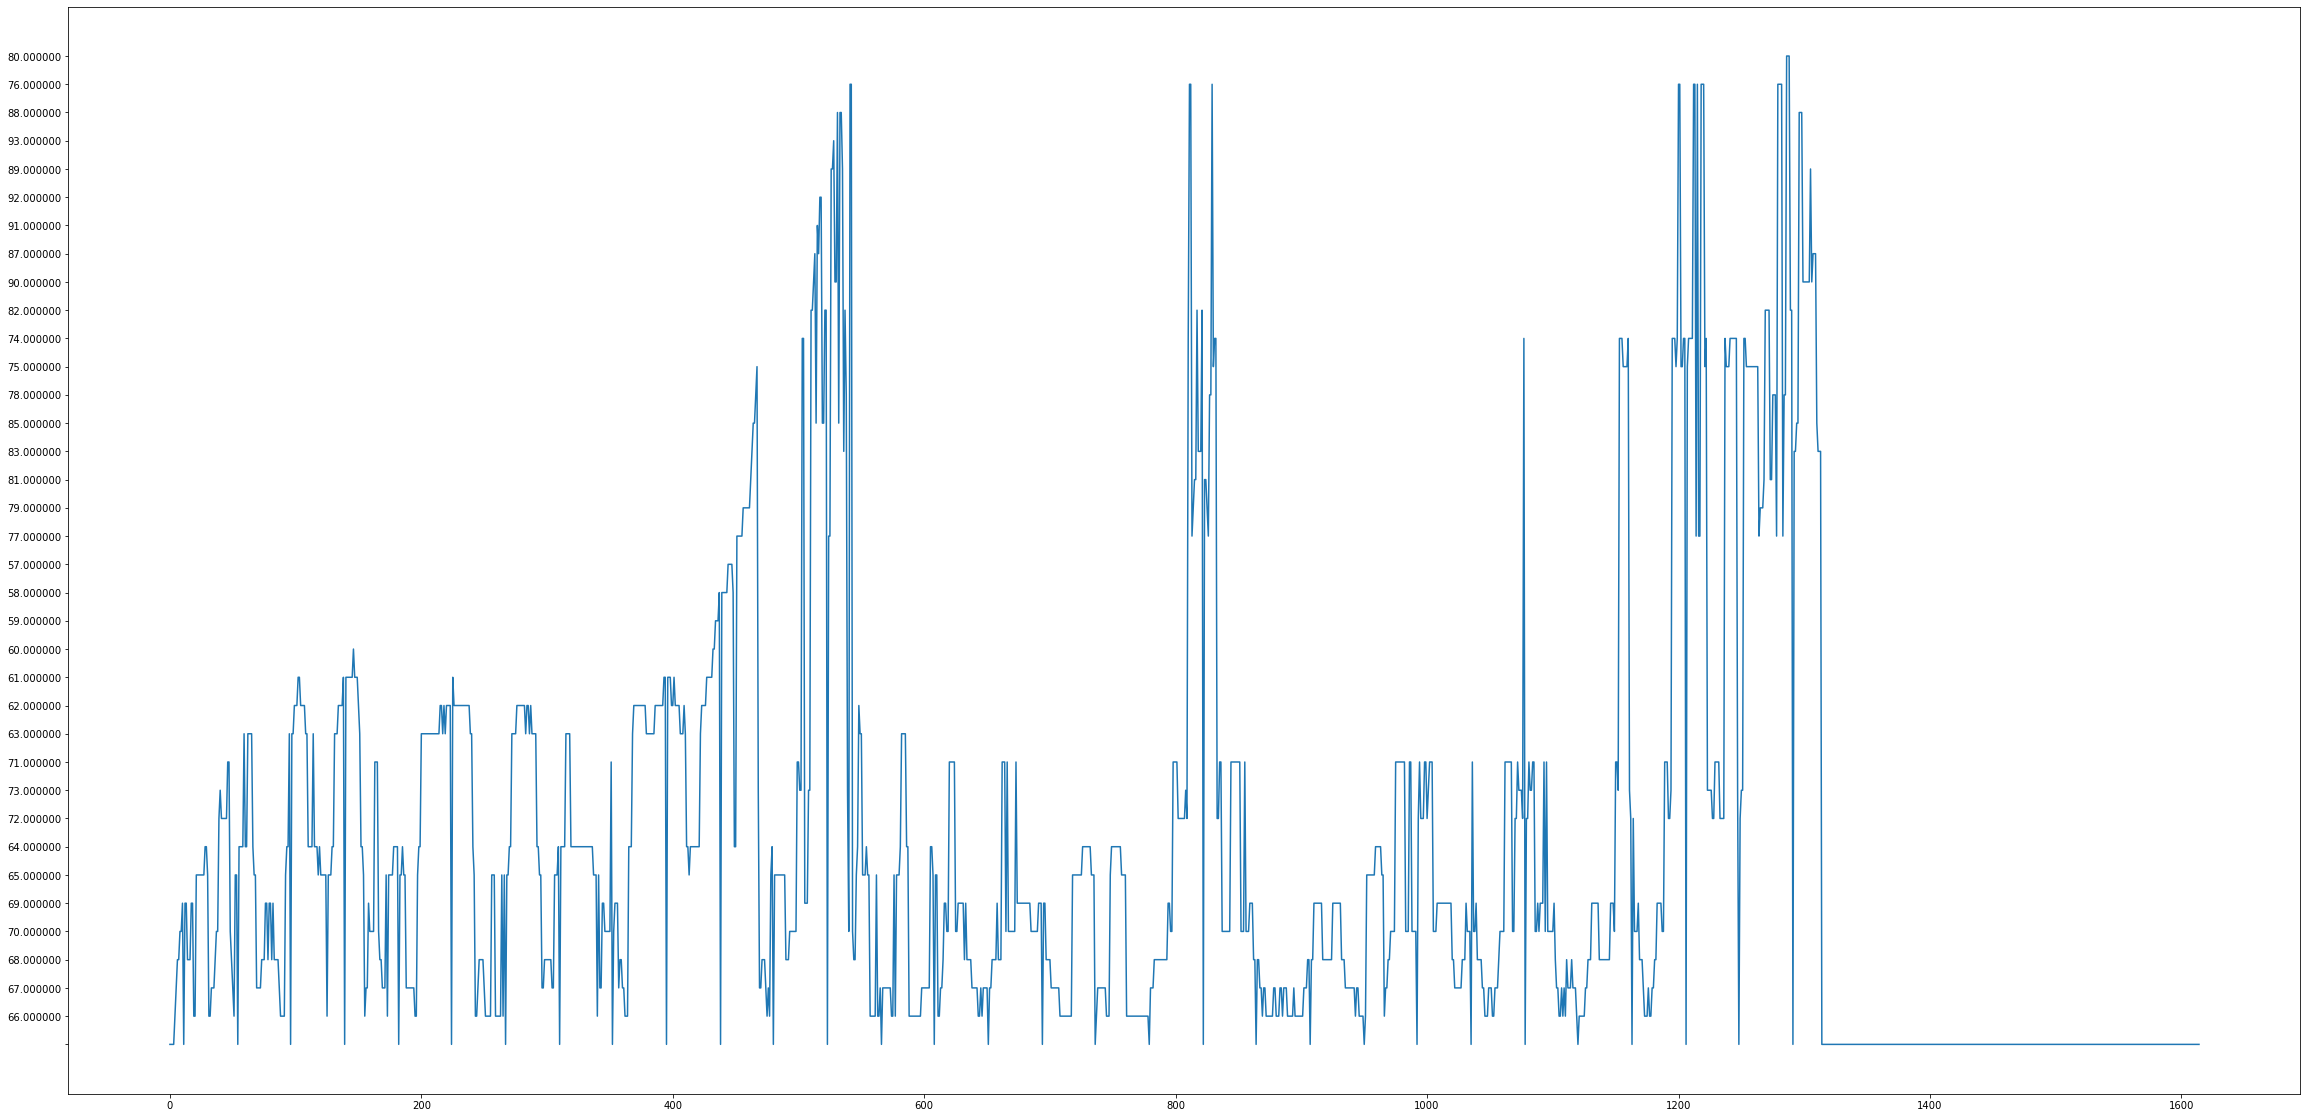

In [15]:
# df.head() 
# len(df['ECG_HR'])
plt.figure(figsize=(40, 20))
plt.plot(df['ECG_HR'])

In [80]:
# df.shape
# df.loc[:300, 'ECG_HR']
sample_df = df.loc[:, ['Time', 'ECG_HR']]


In [91]:
# sample_df.iloc[:10, 0]
values_sample_df = sample_df.values
values_sample_df

array([['0.000000', ''],
       ['1.000000', ''],
       ['2.000000', ''],
       ...,
       ['1612.000000', ''],
       ['1613.000000', ''],
       ['1614.000000', '']], dtype=object)

In [109]:
sample_data = values_sample_df[5:1314]

fixed_sample_data = [] 
for idx, val in enumerate(sample_data):
    if val[1] == '':
        fixed_sample_data.append(sample_data[idx-1, :].astype(np.float32).tolist())
    else:
        fixed_sample_data.append(val.astype(np.float32).tolist())
        

In [112]:
# fixed_sample_data = fixed_sample_data.astype(np.float32)
# fixed_sample_data.tolist()
# sample_data[idx-1, :].astype(np.float32).tolist()
fixed_sample_data = np.array(fixed_sample_data)


In [69]:
# type(sample_data[:, 0])
# sample_data = np.load('sampl_data.npy', allow_pickle=True).astype(np.float32)
sample_data = sample_data.astype(np.float32)

ValueError: could not convert string to float: ''

In [113]:
def split_xy(dataset, timesteps, y_column):
    x, y = list(), list() 
    
    for i in range(len(dataset)):
        x_end_number = i + timesteps
        y_end_number = x_end_number + y_column
        
        if y_end_number > len(dataset):
            break 
        
        tmp_x = dataset[i:x_end_number, 0]
        tmp_y = dataset[x_end_number:y_end_number, 1]
        # print(tmp_y.shape)
        
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)
        
x, y = split_xy(fixed_sample_data, 10, 1)
x, y


(array([[   5.,    6.,    7., ...,   12.,   13.,   14.],
        [   6.,    7.,    8., ...,   13.,   14.,   15.],
        [   7.,    8.,    9., ...,   14.,   15.,   16.],
        ...,
        [1301., 1302., 1303., ..., 1308., 1309., 1310.],
        [1302., 1303., 1304., ..., 1309., 1310., 1311.],
        [1303., 1304., 1305., ..., 1310., 1311., 1312.]]),
 array([[68.],
        [68.],
        [69.],
        ...,
        [83.],
        [83.],
        [83.]]))

In [114]:
x.shape, y.shape
# len(y)
# y.shape


((1299, 10), (1299, 1))

In [115]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=1, test_size=0.3
)

In [116]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((909, 10), (909, 1), (390, 10), (390, 1))

In [117]:
# x_train = np.reshape(x_train, ())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[ 1.31899601,  1.31899706,  1.31896454, ...,  1.3189823 ,
          1.31898737,  1.31896741],
        [ 1.31362021,  1.31362131,  1.31358886, ...,  1.31360658,
          1.31361158,  1.31359174],
        [-0.75068701, -0.75066905, -0.75067374, ..., -0.75066993,
         -0.75069137, -0.75066609],
        ...,
        [ 1.19535261,  1.19535467,  1.19532381, ...,  1.19534074,
          1.19534422,  1.19532697],
        [-1.11892932, -1.11890835, -1.11890808, ..., -1.11890675,
         -1.11893291, -1.11889958],
        [ 1.10127611,  1.10127894,  1.10124935, ...,  1.10126564,
          1.10126792,  1.10125272]]),
 array([[ 1.22760741,  1.22760921,  1.22757792, ...,  1.2249072 ,
          1.22759896,  1.22758099],
        [-0.75606281, -0.75604481, -0.75604942, ..., -0.75604565,
         -0.75606716, -0.75604176],
        [-0.21579491, -0.21578131, -0.2157932 , ..., -0.21578578,
         -0.21580037, -0.21578678],
        ...,
        [-0.92808841, -0.928069  , -0.92807131, ..., -

In [118]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(10, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [119]:
x_train_scaled.shape, y_train.shape

((909, 10), (909, 1))

In [120]:
# y_train = y_train.tolist()
y_train.shape

(909, 1)

In [121]:
from keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

early_stopping = EarlyStopping(patience=20) 
model.fit(x_train_scaled, 
          y_train, 
          validation_split=0.2,
          verbose=1, 
          batch_size=1, 
          epochs=100, 
          callbacks=[early_stopping])

Epoch 1/100
727/727 [==============================] - 4s 4ms/step - loss: 799.6111 - mse: 799.6111 - val_loss: 27.1866 - val_mse: 27.1866
Epoch 2/100
727/727 [==============================] - 3s 4ms/step - loss: 29.0033 - mse: 29.0033 - val_loss: 25.6173 - val_mse: 25.6173
Epoch 3/100
727/727 [==============================] - 3s 4ms/step - loss: 29.0894 - mse: 29.0894 - val_loss: 35.2242 - val_mse: 35.2242
Epoch 4/100
727/727 [==============================] - 3s 3ms/step - loss: 31.5233 - mse: 31.5233 - val_loss: 34.3393 - val_mse: 34.3393
Epoch 5/100
727/727 [==============================] - 3s 4ms/step - loss: 28.0311 - mse: 28.0311 - val_loss: 31.5599 - val_mse: 31.5599
Epoch 6/100
727/727 [==============================] - 2s 3ms/step - loss: 28.9107 - mse: 28.9107 - val_loss: 25.7490 - val_mse: 25.7490
Epoch 7/100
727/727 [==============================] - 2s 3ms/step - loss: 26.7247 - mse: 26.7247 - val_loss: 24.9169 - val_mse: 24.9169
Epoch 8/100
727/727 [==================

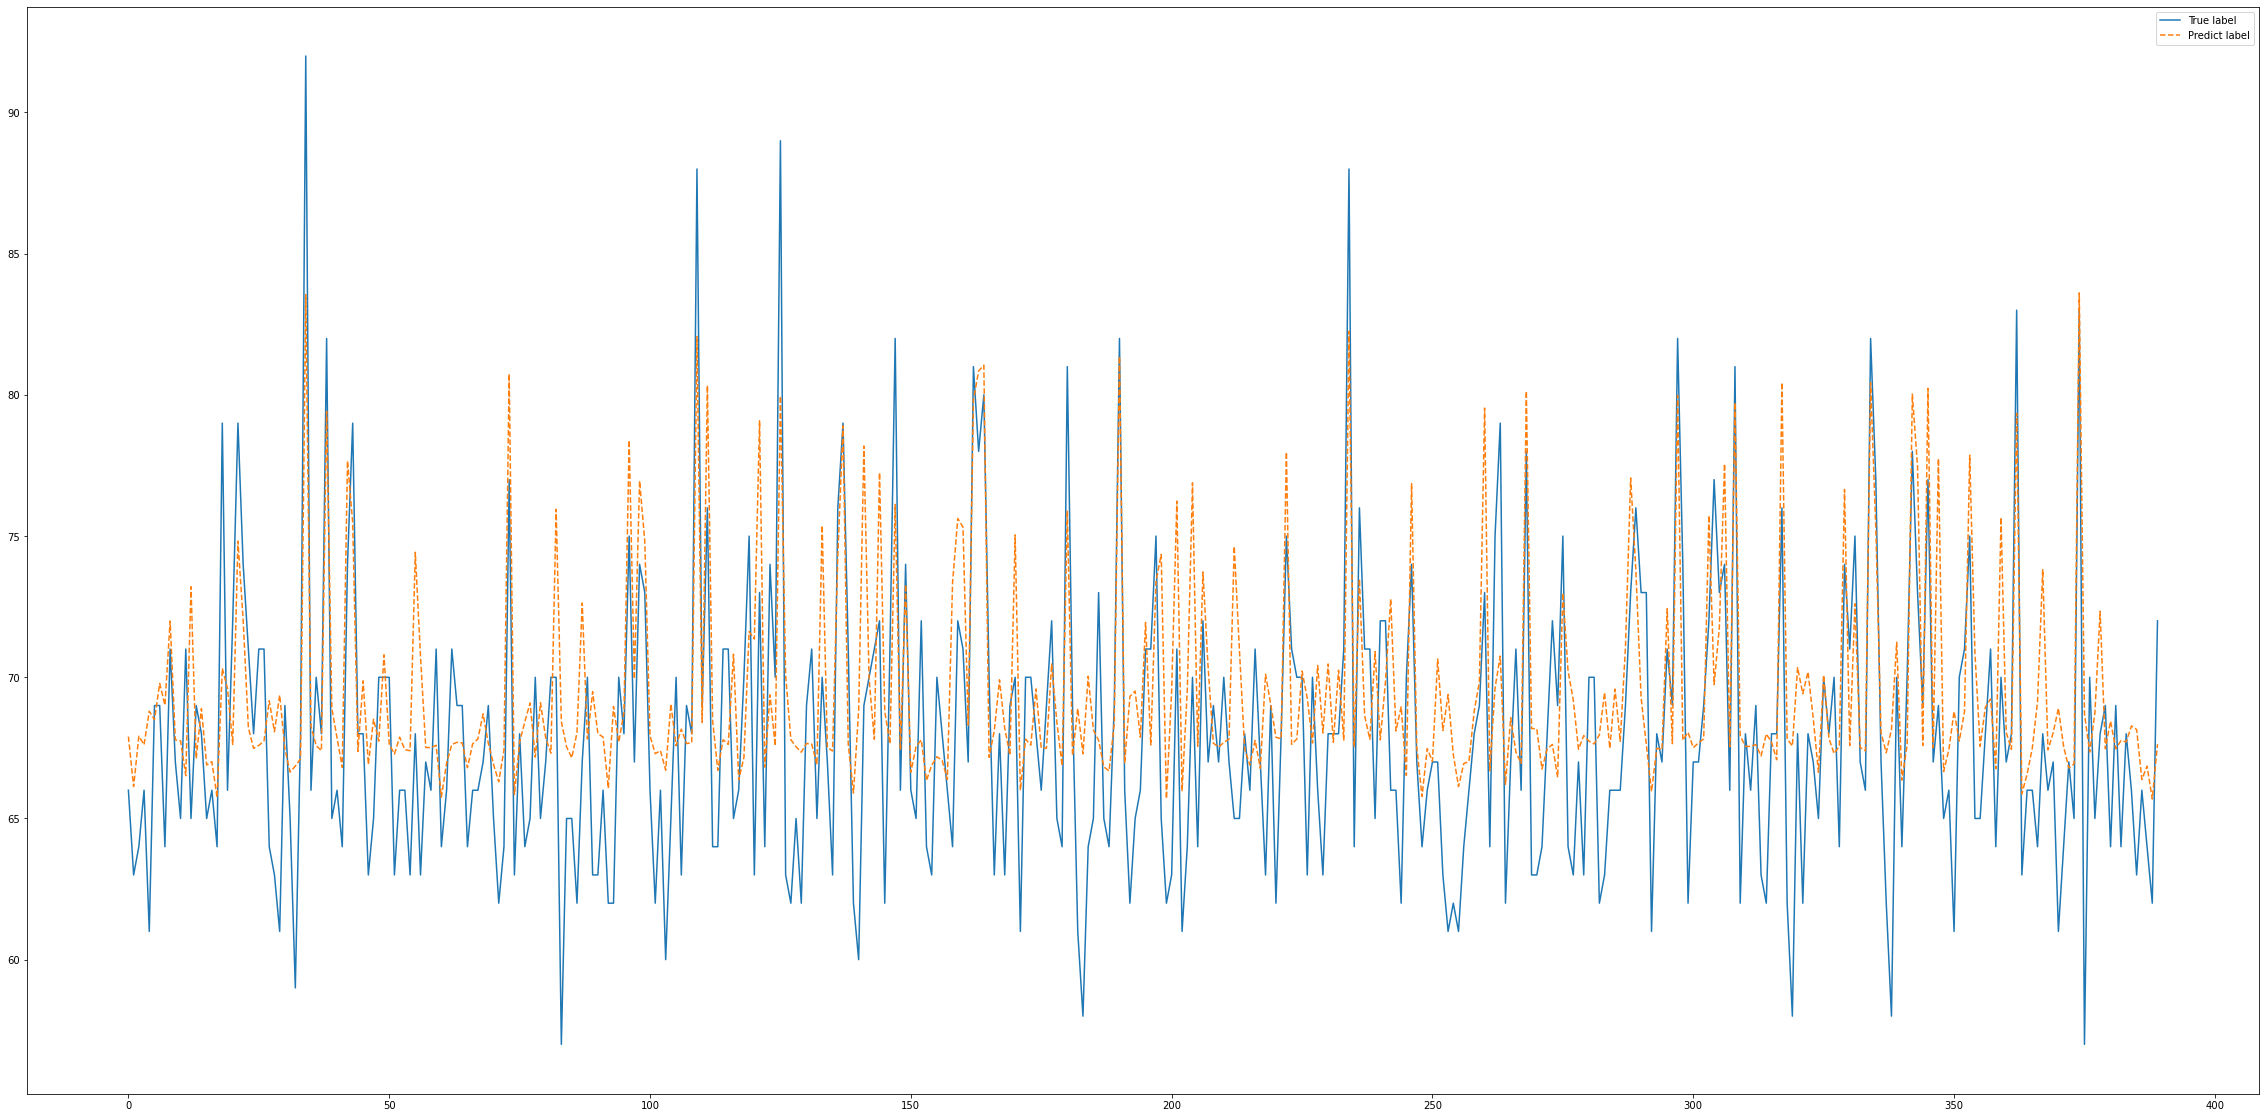

In [123]:
y_pred = model.predict(x_test_scaled)

# y_pred_values = [] 
# for i in range(5):
#     print()

plt.figure(figsize=(40, 20))
plt.plot(y_test, label='True label')
plt.plot(y_pred, '--', label='Predict label')
plt.legend()
plt.show()

In [29]:
x_train_scaled

array([[ 1.5671194 ,  1.5671194 ,  1.5671194 , ...,  1.5671194 ,
         1.5671194 ,  1.5671194 ],
       [ 1.02677481,  1.02677481,  1.02677481, ...,  1.02677481,
         1.02677481,  1.02677481],
       [ 0.2342694 ,  0.2342694 ,  0.2342694 , ...,  0.2342694 ,
         0.2342694 ,  0.2342694 ],
       ...,
       [-0.83441213, -0.83441213, -0.83441213, ..., -0.83441213,
        -0.83441213, -0.83441213],
       [ 1.12283607,  1.12283607,  1.12283607, ...,  1.12283607,
         1.12283607,  1.12283607],
       [-1.25468015, -1.25468015, -1.25468015, ..., -1.25468015,
        -1.25468015, -1.25468015]])

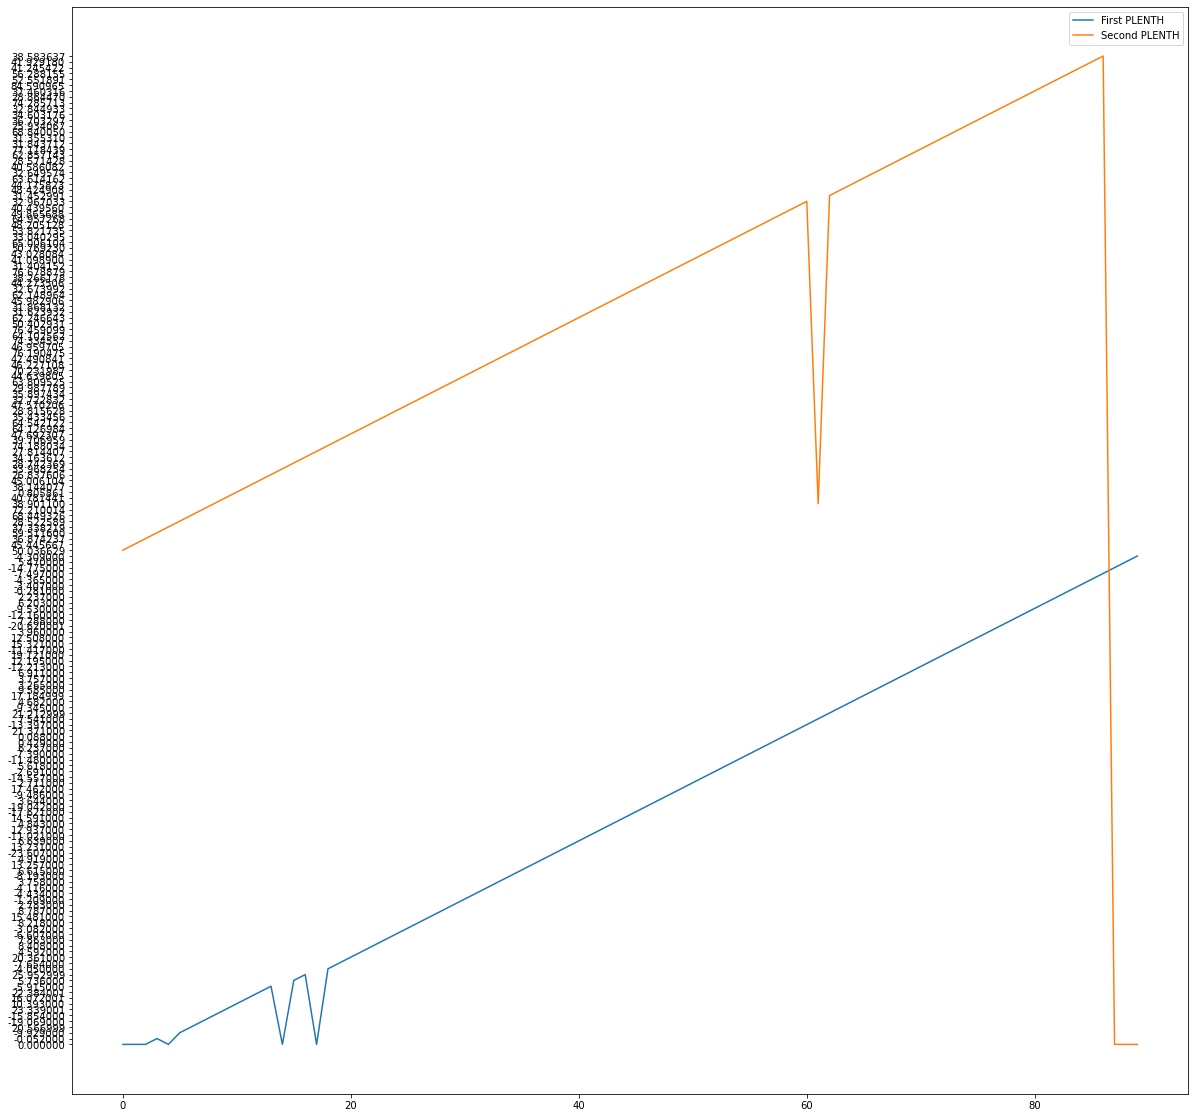

In [12]:
plt.figure(figsize=(20, 20))
plt.plot(df.iloc[:, 1], label='First PLENTH')
plt.plot(df.iloc[:, 3], label='Second PLENTH')
plt.legend()
plt.show()

<AxesSubplot:>

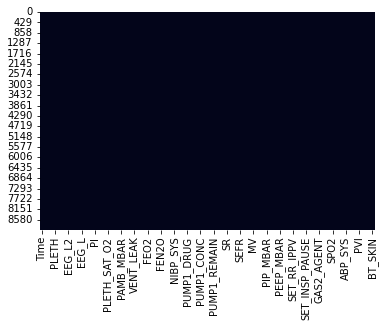

In [3]:
# df.isnull()
import seaborn as sns 

sns.heatmap(df.isnull(), cbar=False)

In [41]:
df[df['ECG_II'] == ''], df[df['CO2'] == '']

(             Time       PLETH ECG_II     PLETH        CO2      EEG_L1  \
 490    490.000000   -9.495000                    1.200000  -31.250000   
 4092  4092.000000  -10.176000                   36.099998   10.416667   
 7694  7694.000000   -7.336000                   31.500000  -14.583333   
 8700  8700.000000  -14.775000         0.000000   0.000000    2.083333   
 8701  8701.000000   32.768002         0.000000   0.000000    2.083333   
 ...           ...         ...    ...       ...        ...         ...   
 8984  8984.000000   -0.399000         0.000000   0.000000    2.083333   
 8985  8985.000000    1.347000         0.000000   0.000000    2.083333   
 8986  8986.000000    1.776000         0.000000               2.083333   
 8987  8987.000000    5.395000                                2.083333   
 8988  8988.000000    3.708000                                           
 
           EEG_L2      EEG_R1      EEG_R2       EEG_L  ...        SPO2  \
 490   -35.416668  -22.916666  -43.7

In [21]:
type(df.loc[0, 'Time'])

numpy.float64

In [24]:
df = df.fillna(0)

In [41]:
# pd.save_csv(df)
# df.save
df.to_csv('test.csv')

In [45]:
# rootdir = r"//Vitalnew/vital_data/Monthly_Confirmed/SNUH_OR"
rootdir = r'D:/first_filtered/'

for dir, dirs, files in os.walk(rootdir):
    
    for file in files[:10]:
        ipath = '{}/{}'.format(dir, file)
        cmd = 'vital_trks {}'.format(ipath)
        p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
        df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')

        devs = []
        for index, row in df.iterrows():
            if row['tname'] != 'SVV':
                continue

            devs.append(row['dname'])


        if not devs:
            continue
        
        if type(devs) == 'float':
            print(devs)
        # print(devs)
        # print('{},{}'.format(ipath[len(rootdir)+1:], ','.join(devs)))

In [18]:
# devs
df.describe()

,Time,PLETH,ECG_II,PLETH,CO2,EEG_L1,EEG_L2,EEG_R1,EEG_R2,EEG_L,...,SPO2,BPM,ABP,ABP_SYS,ABP_DIA,HR,PVI,SET_FLOW_TRIG,PPV,BT_SKIN
count,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989,...,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989
unique,8989,7608,336,2322,421,124,160,159,140,86,...,7,44,1142,57,47,64,31,2,21,197
top,0.000000,0.000000,-0.044999,0.000000,0.000000,2.083333,2.083333,2.083333,2.083333,0.000000,...,99.000000,,,,,,,,,
freq,1,612,350,270,745,1490,1192,1490,1190,1716,...,5517,1119,732,1410,1410,1435,1544,7128,2124,4302
